t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


/tmp/ipykernel_23524/74508008.py:85: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


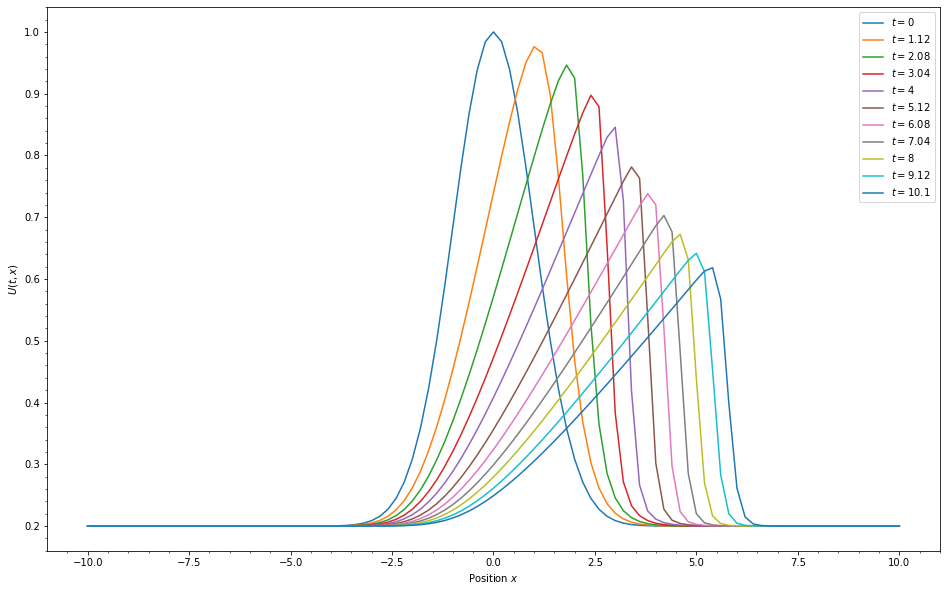

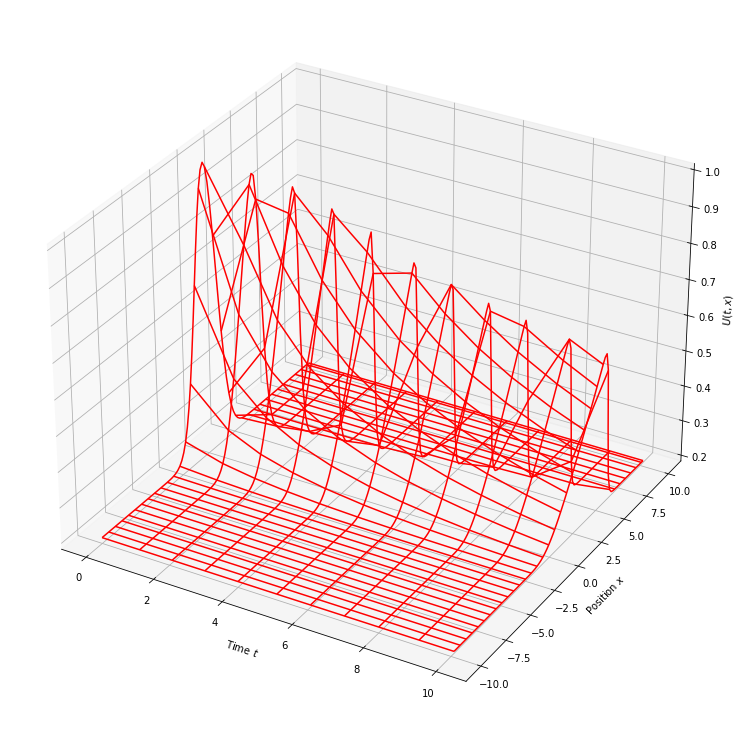

In [1]:
#1.
#Taken from Lecture 10

# Burger's equation:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#package everything in a method for resuability later
def burgers_grid_variation(resolution):
    # Model Parameters
    xmin = -10.0   # left boundary
    xmax = +10.0   # right boundary
    Nx = resolution      # number of grid points (including boundary)
    tend = 10.0    # end time
    dtout = 1.0   # time interval for outputs

    # Set up the grid.
    x = np.linspace(xmin, xmax, Nx)
    dx = (xmax - xmin) / (Nx - 1)
    dt = 0.8 * dx
    U = np.zeros(Nx,)

    # Give the initial profile.
    t = 0.0
    U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

    #Set an initial velocity, will redefine as dU/dt later
    #note that now velocity is set at each x, rather than globally
    vel = np.full(len(U),1.)

    #Upwind method taken from lecture 10

    # Prepare for 3D outputs.
    tp = [t]
    Up = np.copy(U)

    # Initiate the plot.
    fig = plt.figure(figsize=(16,10))
    ax = fig.gca()
    ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
    ax.set_xlabel(r"Position $x$")
    ax.set_ylabel(r"$U(t,x)$")
    ax.minorticks_on()



    # Begin the simulation.
    tout = t + dtout
    while t < tend:
        # Backup the previous time step.
        Uold = np.copy(U)
    
        vel = Uold
        #Change iteration, since velocity is now position dependent
        # Find the state at the next time step.
        for ix in range(1,Nx-1):
            if vel[ix] > 0:
                Ux = (Uold[ix]-Uold[ix-1])/dx
             
                U[ix]=Uold[ix]- vel[ix]*dt*Ux# Task: implement upwind method here.

            else:
                Ux = (Uold[ix+1]-Uold[ix])/dx
                U[ix]=Uold[ix]- vel[ix]*dt*Ux# Task: implement upwind method here.



        t += dt

        # Save the data after every dtout.
        if (t >= tout):
            plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
            tp.append(t)
            Up = np.vstack((Up, U))
            print("t = ", t)
            tout += dtout

    ax.legend()

    # Create 3D-view of the solution.
    t, x = np.meshgrid(tp, x)
    fig3D = plt.figure(figsize=(16,10))
    ax3D = Axes3D(fig3D)
    ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
    ax3D.set_xlabel("Time $t$")
    ax3D.set_ylabel("Position $x$")
    ax3D.set_zlabel(r"$U(t,x)$")

burgers_grid_variation(101)
print("Done.")
plt.show()

t =  1.2800000000000002
t =  2.24
t =  3.200000000000001
t =  4.160000000000002
t =  5.120000000000003
t =  6.080000000000004
t =  7.0400000000000045
t =  8.000000000000005
t =  9.280000000000006
t =  10.240000000000007
Done.


/tmp/ipykernel_23524/74508008.py:85: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


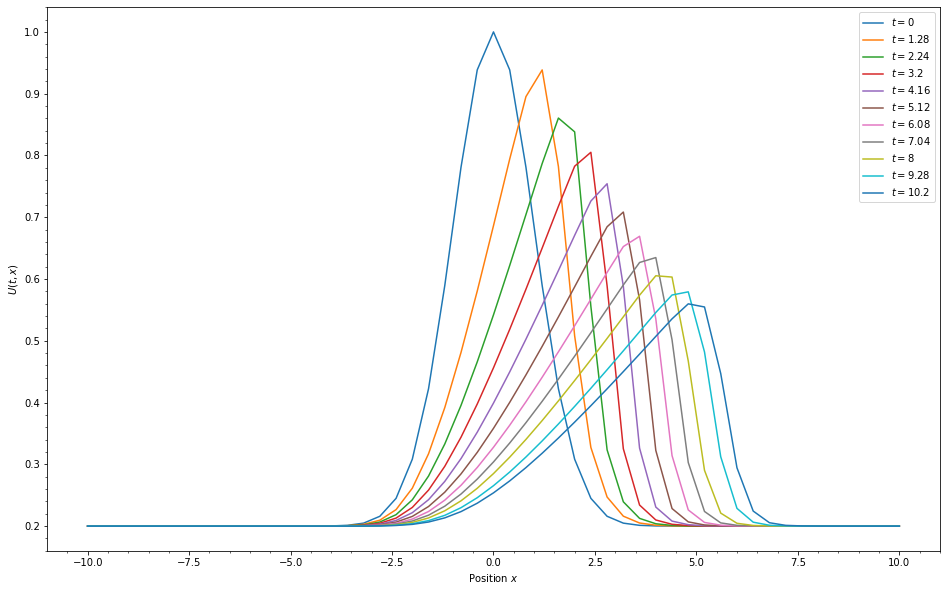

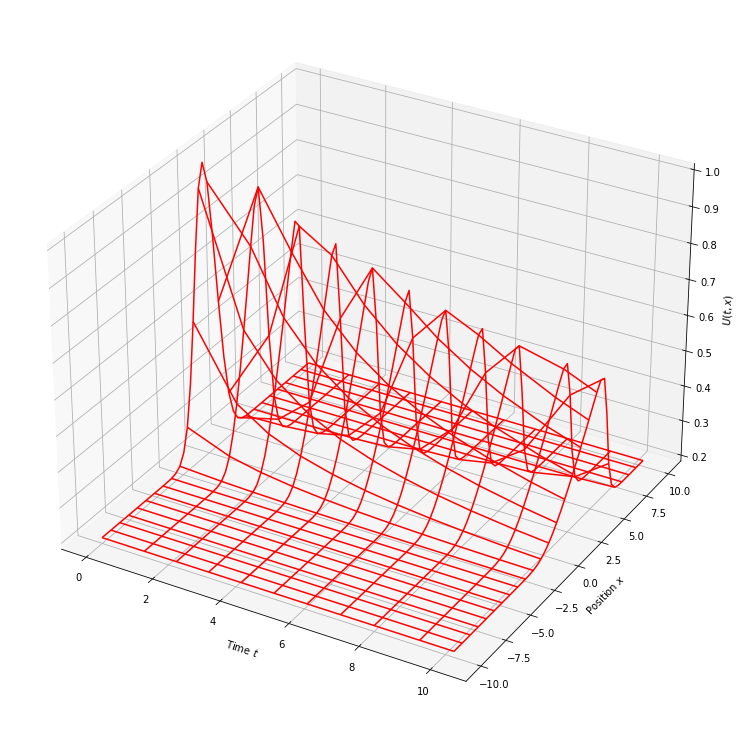

t =  1.0400000000000005
t =  2.0000000000000013
t =  3.0400000000000023
t =  4.000000000000003
t =  5.040000000000004
t =  6.000000000000004
t =  7.040000000000005
t =  8.000000000000005
t =  9.040000000000006
t =  10.000000000000007
Done.


/tmp/ipykernel_23524/74508008.py:85: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


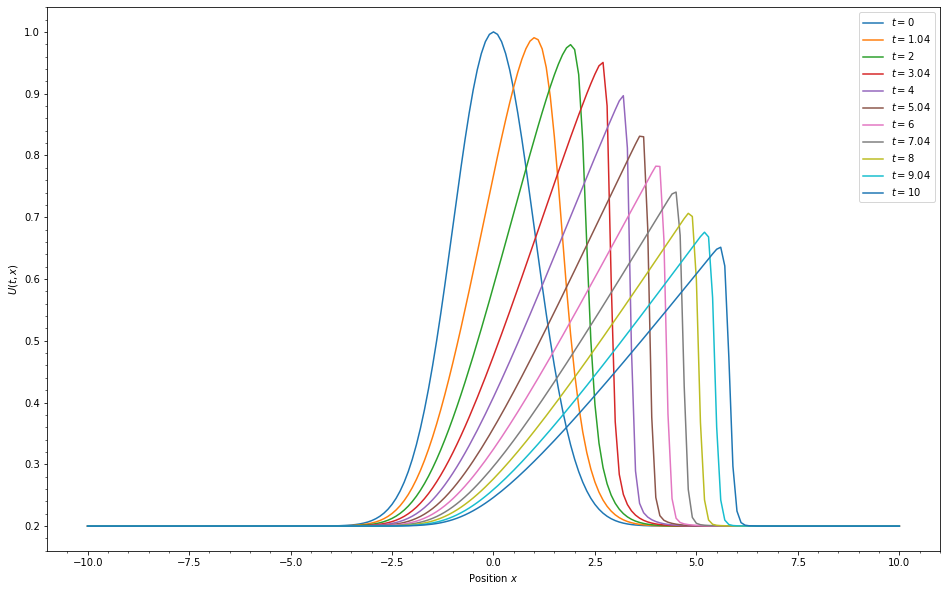

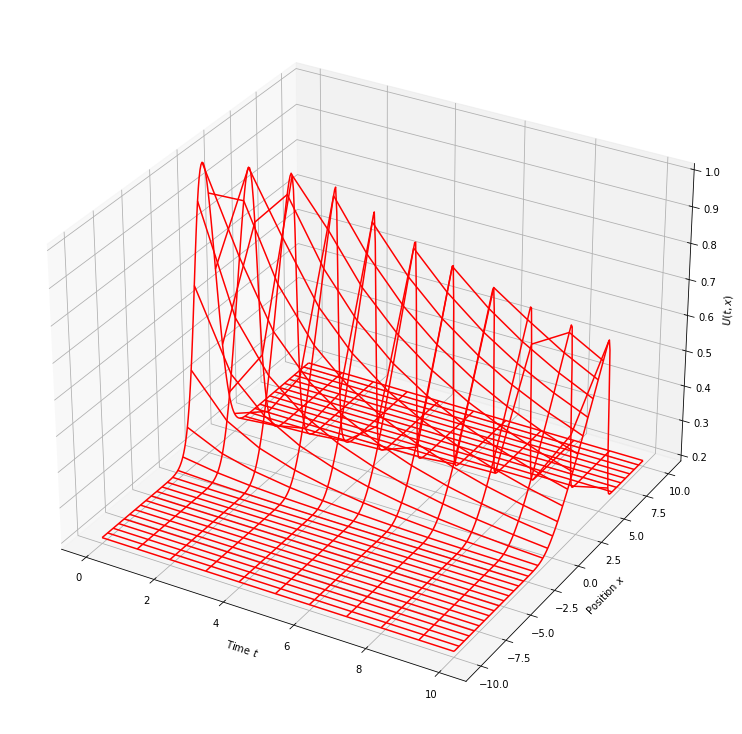

t =  1.0000000000000007
t =  2.0000000000000013
t =  3.000000000000002
t =  4.000000000000003
t =  5.0000000000000036
t =  6.000000000000004
t =  7.000000000000005
t =  8.000000000000005
t =  9.039999999999983
t =  10.039999999999962
Done.


/tmp/ipykernel_23524/74508008.py:85: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax3D = Axes3D(fig3D)


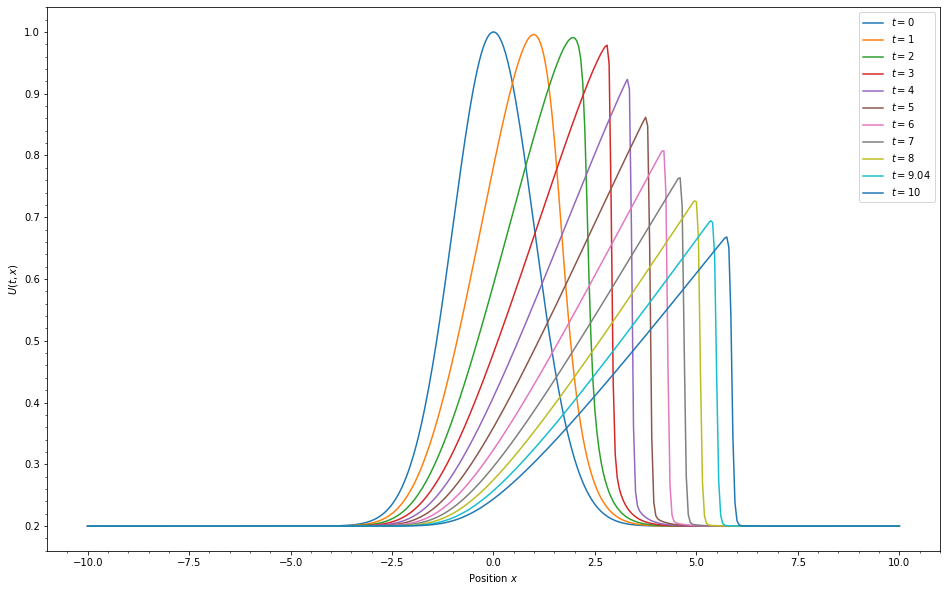

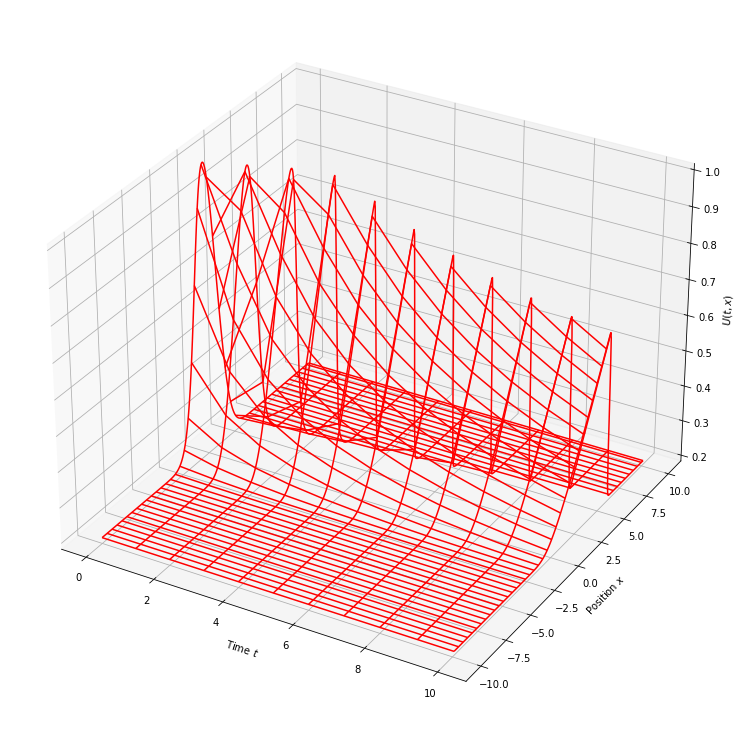

In [3]:
#2. Vary for different N:
burgers_grid_variation(51)
print("Done.")
plt.show()

burgers_grid_variation(201)
print("Done.")
plt.show()

burgers_grid_variation(401)
print("Done.")
plt.show()


In [ ]:
#3.
#The propogating wave moves faster at its peak than its trough, eventually the top 'catches up' to the bottom, creating a shockwave-front.
#In order for the profile to remain the same, we would need the same velocity everywhere. By introducing a differential velocity, we necessarily change the shape of our wave in time.